In [540]:
# import xgboost as xgb
import numpy as np
import pandas as pd
from pandas import read_csv, concat
# from xgboost import XGBRegressor
# from xgboost import plot_importance
from matplotlib import pyplot as plt
from numpy import transpose
from sklearn import metrics

In [541]:
X_train = read_csv('./csv/trainfull_modifie.csv', index_col=0)
X_test = read_csv('./csv/test_modifie.csv', index_col=0)
y_train = X_train.SalePrice.values.astype(int)
del X_train['SalePrice']

In [542]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LotConfig,Neighborhood,Condition1,BldgType,...,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,YrSold,SaleType,SaleCondition
1,60,RL,65,8450,None,4,Inside,CollgCr,Norm,1Fam,...,548,3,0,61,None,None,0,2008-02-01,WD,Normal
2,20,RL,80,9600,None,4,FR2,Veenker,Feedr,1Fam,...,460,3,298,0,None,None,0,2007-05-01,WD,Normal
3,60,RL,68,11250,None,3,Inside,CollgCr,Norm,1Fam,...,608,3,0,42,None,None,0,2008-09-01,WD,Normal
4,70,RL,60,9550,None,3,Corner,Crawfor,Norm,1Fam,...,642,3,0,35,None,None,0,2006-02-01,WD,Abnorml
5,60,RL,84,14260,None,3,FR2,NoRidge,Norm,1Fam,...,836,3,192,84,None,None,0,2008-12-01,WD,Normal


In [543]:
X_train.shape[1:]

(60,)

In [544]:
X_train = X_train.append(X_test)
X_train.shape

(2919, 60)

In [545]:
X_train = pd.get_dummies(X_train)
X_train

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,RoofMatl,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1,60,65,8450,4,7,5,0,196,4,3,...,0,0,0,1,0,0,0,0,1,0
2,20,80,9600,4,6,8,0,0,3,3,...,0,0,0,1,0,0,0,0,1,0
3,60,68,11250,3,7,5,0,162,4,3,...,0,0,0,1,0,0,0,0,1,0
4,70,60,9550,3,7,5,0,0,3,3,...,0,0,0,1,1,0,0,0,0,0
5,60,84,14260,3,8,5,0,350,4,3,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21,1936,4,4,7,0,0,3,3,...,0,0,0,1,0,0,0,0,1,0
2916,160,21,1894,4,4,5,0,0,3,3,...,0,0,0,1,1,0,0,0,0,0
2917,20,160,20000,4,5,7,0,0,3,3,...,0,0,0,1,1,0,0,0,0,0
2918,85,62,10441,4,5,5,0,0,3,3,...,0,0,0,1,0,0,0,0,1,0


In [546]:
X_test = X_train[1460:]
X_train = X_train[:1460]

In [547]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Input(shape = X_train.shape[1]))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1))

In [548]:
from tensorflow.keras.optimizers import SGD, Adam

loss = 'mse'
LEARNING_RATE = 0.23
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE), metrics=['accuracy'])

In [549]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler2 = StandardScaler()
scaler.fit(X_train)
y_tr = transpose([y_train])
scaler2.fit(y_tr)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_train = scaler2.transform(y_tr)

In [550]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 2000 # how many iterations over the whole dataset
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1460 samples
Epoch 1/2000
1460/1460 [==============================] - 0s 231us/sample - loss: 1.8342 - accuracy: 0.0000e+00
Epoch 2/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 1.0306 - accuracy: 0.0000e+00
Epoch 3/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.9984 - accuracy: 0.0000e+00
Epoch 4/2000
1460/1460 [==============================] - 0s 11us/sample - loss: 0.9974 - accuracy: 0.0000e+00
Epoch 5/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.9967 - accuracy: 0.0000e+00
Epoch 6/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.9960 - accuracy: 0.0000e+00
Epoch 7/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.9954 - accuracy: 0.0000e+00
Epoch 8/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.9947 - accuracy: 0.0000e+00
Epoch 9/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.9940 - accura

Epoch 75/2000
1460/1460 [==============================] - 0s 11us/sample - loss: 0.5173 - accuracy: 0.0000e+00
Epoch 76/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.4963 - accuracy: 0.0000e+00
Epoch 77/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.4761 - accuracy: 0.0000e+00
Epoch 78/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.4568 - accuracy: 0.0000e+00
Epoch 79/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.4386 - accuracy: 0.0000e+00
Epoch 80/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.4217 - accuracy: 0.0000e+00
Epoch 81/2000
1460/1460 [==============================] - 0s 13us/sample - loss: 0.4059 - accuracy: 0.0000e+00
Epoch 82/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.3914 - accuracy: 0.0000e+00
Epoch 83/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.3780 - accuracy: 0.0000e

Epoch 149/2000
1460/1460 [==============================] - 0s 12us/sample - loss: 0.1485 - accuracy: 0.0000e+00
Epoch 150/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1475 - accuracy: 0.0000e+00
Epoch 151/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.1464 - accuracy: 0.0000e+00
Epoch 152/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.1454 - accuracy: 0.0000e+00
Epoch 153/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1444 - accuracy: 0.0000e+00
Epoch 154/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1434 - accuracy: 0.0000e+00
Epoch 155/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1425 - accuracy: 0.0000e+00
Epoch 156/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1415 - accuracy: 0.0000e+00
Epoch 157/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1406 - accuracy: 0.

1460/1460 [==============================] - 0s 13us/sample - loss: 0.1113 - accuracy: 0.0000e+00
Epoch 223/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1107 - accuracy: 0.0000e+00
Epoch 224/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1102 - accuracy: 0.0000e+00
Epoch 225/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1097 - accuracy: 0.0000e+00
Epoch 226/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1092 - accuracy: 0.0000e+00
Epoch 227/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1087 - accuracy: 0.0000e+00
Epoch 228/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1082 - accuracy: 0.0000e+00
Epoch 229/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1077 - accuracy: 0.0000e+00
Epoch 230/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1072 - accuracy: 0.0000e+00
Epoch 

Epoch 296/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0951 - accuracy: 0.0000e+00
Epoch 297/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0948 - accuracy: 0.0000e+00
Epoch 298/2000
1460/1460 [==============================] - 0s 12us/sample - loss: 0.0947 - accuracy: 0.0000e+00
Epoch 299/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0944 - accuracy: 0.0000e+00
Epoch 300/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0944 - accuracy: 0.0000e+00
Epoch 301/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0943 - accuracy: 0.0000e+00
Epoch 302/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0944 - accuracy: 0.0000e+00
Epoch 303/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0944 - accuracy: 0.0000e+00
Epoch 304/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0948 - accuracy: 0.

1460/1460 [==============================] - 0s 9us/sample - loss: 0.1041 - accuracy: 0.0000e+00
Epoch 370/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1081 - accuracy: 0.0000e+00
Epoch 371/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1082 - accuracy: 0.0000e+00
Epoch 372/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1131 - accuracy: 0.0000e+00
Epoch 373/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1130 - accuracy: 0.0000e+00
Epoch 374/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1189 - accuracy: 0.0000e+00
Epoch 375/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.1182 - accuracy: 0.0000e+00
Epoch 376/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1249 - accuracy: 0.0000e+00
Epoch 377/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.1234 - accuracy: 0.0000e+00
Epoch 3

Epoch 443/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.1040 - accuracy: 0.0000e+00
Epoch 444/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1071 - accuracy: 0.0000e+00
Epoch 445/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1034 - accuracy: 0.0000e+00
Epoch 446/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1063 - accuracy: 0.0000e+00
Epoch 447/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.1024 - accuracy: 0.0000e+00
Epoch 448/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.1049 - accuracy: 0.0000e+00
Epoch 449/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1010 - accuracy: 0.0000e+00
Epoch 450/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.1032 - accuracy: 0.0000e+00
Epoch 451/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0994 - accuracy: 0.0

1460/1460 [==============================] - 0s 9us/sample - loss: 0.0843 - accuracy: 0.0000e+00
Epoch 517/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0819 - accuracy: 0.0000e+00
Epoch 518/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0834 - accuracy: 0.0000e+00
Epoch 519/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0811 - accuracy: 0.0000e+00
Epoch 520/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0825 - accuracy: 0.0000e+00
Epoch 521/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0803 - accuracy: 0.0000e+00
Epoch 522/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0816 - accuracy: 0.0000e+00
Epoch 523/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0795 - accuracy: 0.0000e+00
Epoch 524/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0808 - accuracy: 0.0000e+00
Epoch 

Epoch 590/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0712 - accuracy: 0.0000e+00
Epoch 591/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0695 - accuracy: 0.0000e+00
Epoch 592/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0708 - accuracy: 0.0000e+00
Epoch 593/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0691 - accuracy: 0.0000e+00
Epoch 594/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0704 - accuracy: 0.0000e+00
Epoch 595/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0686 - accuracy: 0.0000e+00
Epoch 596/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0699 - accuracy: 0.0000e+00
Epoch 597/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0682 - accuracy: 0.0000e+00
Epoch 598/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0695 - accuracy: 0.

1460/1460 [==============================] - 0s 9us/sample - loss: 0.0592 - accuracy: 0.0000e+00
Epoch 664/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0603 - accuracy: 0.0000e+00
Epoch 665/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0588 - accuracy: 0.0000e+00
Epoch 666/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0599 - accuracy: 0.0000e+00
Epoch 667/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0585 - accuracy: 0.0000e+00
Epoch 668/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0595 - accuracy: 0.0000e+00
Epoch 669/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0581 - accuracy: 0.0000e+00
Epoch 670/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0592 - accuracy: 0.0000e+00
Epoch 671/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0577 - accuracy: 0.0000e+00
Epoch 6

Epoch 737/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0503 - accuracy: 0.0000e+00
Epoch 738/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0512 - accuracy: 0.0000e+00
Epoch 739/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0500 - accuracy: 0.0000e+00
Epoch 740/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0509 - accuracy: 0.0000e+00
Epoch 741/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0498 - accuracy: 0.0000e+00
Epoch 742/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0507 - accuracy: 0.0000e+00
Epoch 743/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0495 - accuracy: 0.0000e+00
Epoch 744/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0504 - accuracy: 0.0000e+00
Epoch 745/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0493 - accuracy: 0.0

1460/1460 [==============================] - 0s 11us/sample - loss: 0.0441 - accuracy: 0.0000e+00
Epoch 811/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0432 - accuracy: 0.0000e+00
Epoch 812/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0440 - accuracy: 0.0000e+00
Epoch 813/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0430 - accuracy: 0.0000e+00
Epoch 814/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0438 - accuracy: 0.0000e+00
Epoch 815/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0429 - accuracy: 0.0000e+00
Epoch 816/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0436 - accuracy: 0.0000e+00
Epoch 817/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 818/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0434 - accuracy: 0.0000e+00
Epoch 

Epoch 884/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0395 - accuracy: 0.0000e+00
Epoch 885/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0386 - accuracy: 0.0000e+00
Epoch 886/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0394 - accuracy: 0.0000e+00
Epoch 887/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0385 - accuracy: 0.0000e+00
Epoch 888/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0393 - accuracy: 0.0000e+00
Epoch 889/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0383 - accuracy: 0.0000e+00
Epoch 890/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0391 - accuracy: 0.0000e+00
Epoch 891/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0382 - accuracy: 0.0000e+00
Epoch 892/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0389 - accuracy: 0.0

Epoch 957/2000
1460/1460 [==============================] - 0s 16us/sample - loss: 0.0331 - accuracy: 0.0000e+00
Epoch 958/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0337 - accuracy: 0.0000e+00
Epoch 959/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0330 - accuracy: 0.0000e+00
Epoch 960/2000
1460/1460 [==============================] - 0s 11us/sample - loss: 0.0336 - accuracy: 0.0000e+00
Epoch 961/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0329 - accuracy: 0.0000e+00
Epoch 962/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0335 - accuracy: 0.0000e+00
Epoch 963/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0328 - accuracy: 0.0000e+00
Epoch 964/2000
1460/1460 [==============================] - 0s 11us/sample - loss: 0.0335 - accuracy: 0.0000e+00
Epoch 965/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0327 - accurac

Epoch 1030/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0296 - accuracy: 0.0000e+00
Epoch 1031/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0290 - accuracy: 0.0000e+00
Epoch 1032/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0295 - accuracy: 0.0000e+00
Epoch 1033/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0289 - accuracy: 0.0000e+00
Epoch 1034/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0294 - accuracy: 0.0000e+00
Epoch 1035/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0288 - accuracy: 0.0000e+00
Epoch 1036/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0293 - accuracy: 0.0000e+00
Epoch 1037/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0287 - accuracy: 0.0000e+00
Epoch 1038/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0292 - ac

Epoch 1103/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0260 - accuracy: 0.0000e+00
Epoch 1104/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0264 - accuracy: 0.0000e+00
Epoch 1105/2000
1460/1460 [==============================] - 0s 11us/sample - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 1106/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0263 - accuracy: 0.0000e+00
Epoch 1107/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0258 - accuracy: 0.0000e+00
Epoch 1108/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0263 - accuracy: 0.0000e+00
Epoch 1109/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0257 - accuracy: 0.0000e+00
Epoch 1110/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0262 - accuracy: 0.0000e+00
Epoch 1111/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0256 - acc

Epoch 1176/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0239 - accuracy: 0.0000e+00
Epoch 1177/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0234 - accuracy: 0.0000e+00
Epoch 1178/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0238 - accuracy: 0.0000e+00
Epoch 1179/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0233 - accuracy: 0.0000e+00
Epoch 1180/2000
1460/1460 [==============================] - 0s 13us/sample - loss: 0.0237 - accuracy: 0.0000e+00
Epoch 1181/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0233 - accuracy: 0.0000e+00
Epoch 1182/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0237 - accuracy: 0.0000e+00
Epoch 1183/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0232 - accuracy: 0.0000e+00
Epoch 1184/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0236 - acc

Epoch 1249/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0213 - accuracy: 0.0000e+00
Epoch 1250/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 1251/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0212 - accuracy: 0.0000e+00
Epoch 1252/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0216 - accuracy: 0.0000e+00
Epoch 1253/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0212 - accuracy: 0.0000e+00
Epoch 1254/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0215 - accuracy: 0.0000e+00
Epoch 1255/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 1256/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0215 - accuracy: 0.0000e+00
Epoch 1257/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0211 - accu

Epoch 1322/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 1323/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0195 - accuracy: 0.0000e+00
Epoch 1324/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 1325/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 1326/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 1327/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 1328/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0197 - accuracy: 0.0000e+00
Epoch 1329/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0193 - accuracy: 0.0000e+00
Epoch 1330/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0197 - acc

Epoch 1395/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0180 - accuracy: 0.0000e+00
Epoch 1396/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0183 - accuracy: 0.0000e+00
Epoch 1397/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0179 - accuracy: 0.0000e+00
Epoch 1398/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0183 - accuracy: 0.0000e+00
Epoch 1399/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0179 - accuracy: 0.0000e+00
Epoch 1400/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 1401/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0179 - accuracy: 0.0000e+00
Epoch 1402/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0182 - accuracy: 0.0000e+00
Epoch 1403/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0178 - acc

Epoch 1468/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 1469/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 1470/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0170 - accuracy: 0.0000e+00
Epoch 1471/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 1472/2000
1460/1460 [==============================] - 0s 12us/sample - loss: 0.0169 - accuracy: 0.0000e+00
Epoch 1473/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0166 - accuracy: 0.0000e+00
Epoch 1474/2000
1460/1460 [==============================] - 0s 12us/sample - loss: 0.0169 - accuracy: 0.0000e+00
Epoch 1475/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 1476/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0169 - a

Epoch 1541/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0155 - accuracy: 0.0000e+00
Epoch 1542/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 1543/2000
1460/1460 [==============================] - 0s 12us/sample - loss: 0.0155 - accuracy: 0.0000e+00
Epoch 1544/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 1545/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0155 - accuracy: 0.0000e+00
Epoch 1546/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0158 - accuracy: 0.0000e+00
Epoch 1547/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0154 - accuracy: 0.0000e+00
Epoch 1548/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0157 - accuracy: 0.0000e+00
Epoch 1549/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0154 -

Epoch 1614/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 1615/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 1616/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 1617/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0145 - accuracy: 0.0000e+00
Epoch 1618/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 1619/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 1620/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0147 - accuracy: 0.0000e+00
Epoch 1621/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0144 - accuracy: 0.0000e+00
Epoch 1622/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0147 - acc

Epoch 1687/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 1688/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0139 - accuracy: 0.0000e+00
Epoch 1689/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 1690/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0139 - accuracy: 0.0000e+00
Epoch 1691/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0136 - accuracy: 0.0000e+00
Epoch 1692/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 1693/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0135 - accuracy: 0.0000e+00
Epoch 1694/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0138 - accuracy: 0.0000e+00
Epoch 1695/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0135 - acc

Epoch 1760/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0131 - accuracy: 0.0000e+00
Epoch 1761/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 1762/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 1763/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0128 - accuracy: 0.0000e+00
Epoch 1764/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 1765/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 1766/2000
1460/1460 [==============================] - 0s 5us/sample - loss: 0.0130 - accuracy: 0.0000e+00
Epoch 1767/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0127 - accuracy: 0.0000e+00
Epoch 1768/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0130 - acc

Epoch 1833/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 1834/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0124 - accuracy: 0.0000e+00
Epoch 1835/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 1836/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0123 - accuracy: 0.0000e+00
Epoch 1837/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0121 - accuracy: 0.0000e+00
Epoch 1838/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0123 - accuracy: 0.0000e+00
Epoch 1839/2000
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0120 - accuracy: 0.0000e+00
Epoch 1840/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0123 - accuracy: 0.0000e+00
Epoch 1841/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0120 - acc

Epoch 1906/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 1907/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 1908/2000
1460/1460 [==============================] - 0s 6us/sample - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 1909/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0116 - accuracy: 0.0000e+00
Epoch 1910/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 1911/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0116 - accuracy: 0.0000e+00
Epoch 1912/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0119 - accuracy: 0.0000e+00
Epoch 1913/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0116 - accuracy: 0.0000e+00
Epoch 1914/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0119 - accu

Epoch 1979/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 1980/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0109 - accuracy: 0.0000e+00
Epoch 1981/2000
1460/1460 [==============================] - 0s 10us/sample - loss: 0.0106 - accuracy: 0.0000e+00
Epoch 1982/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0108 - accuracy: 0.0000e+00
Epoch 1983/2000
1460/1460 [==============================] - 0s 8us/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 1984/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0108 - accuracy: 0.0000e+00
Epoch 1985/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0105 - accuracy: 0.0000e+00
Epoch 1986/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0107 - accuracy: 0.0000e+00
Epoch 1987/2000
1460/1460 [==============================] - 0s 7us/sample - loss: 0.0105 - acc

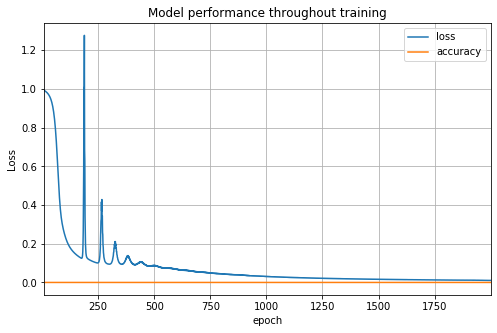

In [551]:
import pandas as pd
%matplotlib inline

pd.DataFrame(history.history).iloc[10:].plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [552]:
y_predict = model.predict(X_train)

In [553]:
metrics.mean_absolute_error(scaler2.inverse_transform(y_train), scaler2.inverse_transform(y_predict))

6323.325406678082

In [554]:
y_pred = model.predict(X_test)

In [555]:
y_pred = y_pred.reshape(y_pred.shape[0])
y_pred_trans = scaler2.inverse_transform(y_pred)

In [556]:
submission = pd.DataFrame({'Id': range(1461, 2920), 'SalePrice':y_pred_trans})
submission

,Id,SalePrice
0,1461,120700.343750
1,1462,157383.937500
2,1463,205859.921875
3,1464,213548.921875
4,1465,182027.875000
...,...,...
1454,2915,81142.320312
1455,2916,83419.312500
1456,2917,172936.203125
1457,2918,114346.609375


In [557]:
submission.to_csv('./csv/prediction.csv', index=False)

In [558]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_116 (Dense)            (None, 30)                15930     
_________________________________________________________________
dense_117 (Dense)            (None, 15)                465       
_________________________________________________________________
dense_118 (Dense)            (None, 5)                 80        
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 6         
Total params: 16,481
Trainable params: 16,481
Non-trainable params: 0
_________________________________________________________________
